# Decomposition methods

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

plt.rc('font', family='Verdana')

import sys
import warnings
warnings.filterwarnings('ignore')

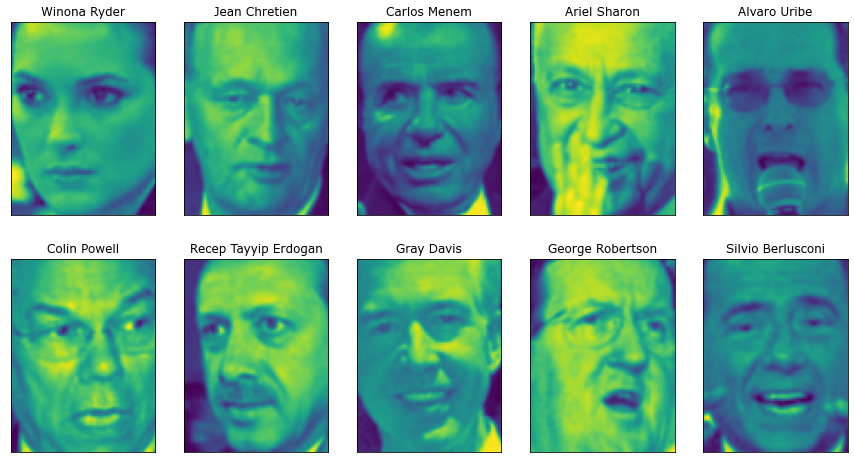

In [22]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [23]:
print("array of faces shape: {}".format(people.images.shape))
print("class count: {}".format(len(people.target_names)))

array of faces shape: (3023, 87, 65)
class count: 62


In [24]:
# every face frekvency
counts = np.bincount(people.target)

# print results
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [25]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# to get higher perforamnce scale X_people color to be from 0 to 1, instead of 0 to 255

X_people = X_people / 255

# пробуем kneighbour классификатор с одним соседом

In [26]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("test score on 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

test score on 1-nn: 0.23


23% for 62 classes test score is not bad ( random guess gives only -


In [27]:
print("{} %".format(1 / 62 * 100)) # %

1.6129032258064515 %


## теперь воспользуемся функцией PCA выбеливания

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("train data after PCA: {}".format(X_train_pca.shape))

train data after PCA: (1547, 100)


In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("score on test data: {:.2f}".format(knn.score(X_test_pca, y_test)))

score on test data: 0.31


In [30]:
print("shape of pca.components_: {}".format(pca.components_.shape))

shape of pca.components_: (100, 5655)


In [31]:
# 87 * 65 pixels = 5655

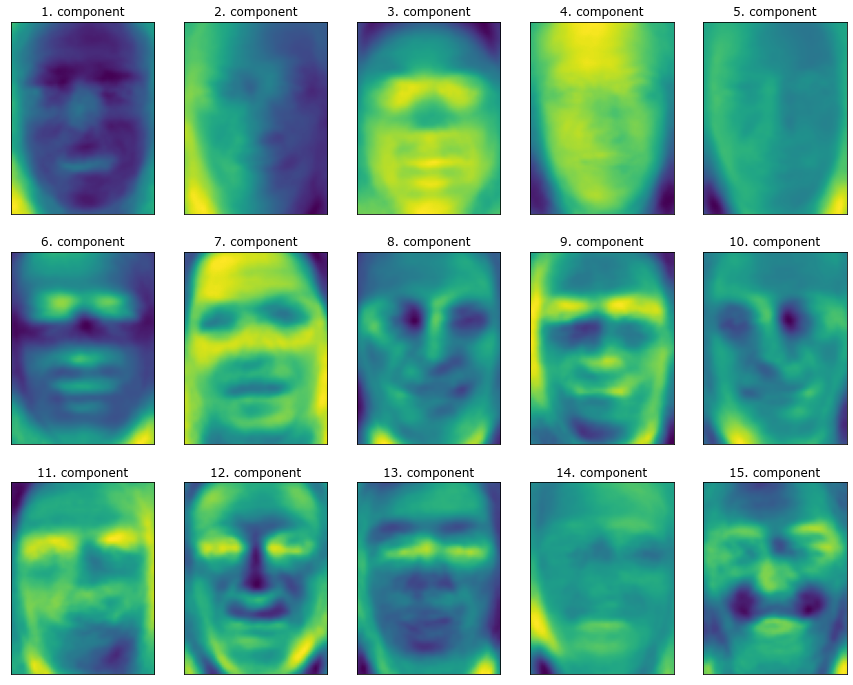

In [32]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

# now test nmf

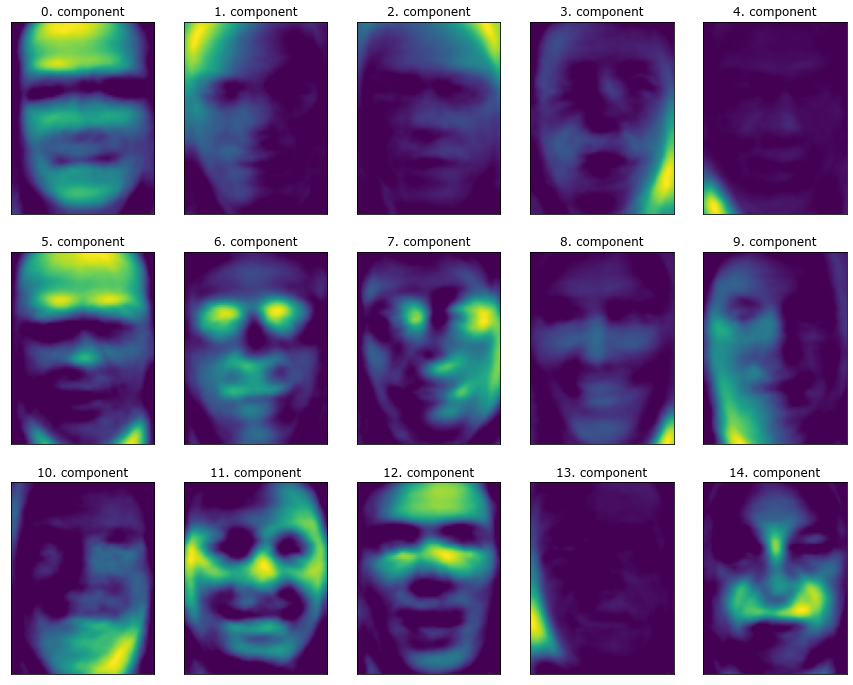

In [33]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [34]:
# 15 components

3rd component


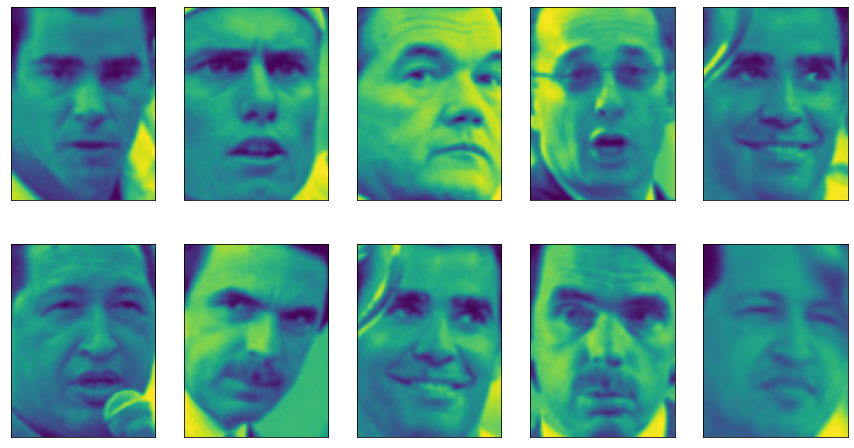

In [35]:
compn= 3

# sort by 3rd component print 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
print("3rd component")

7th component


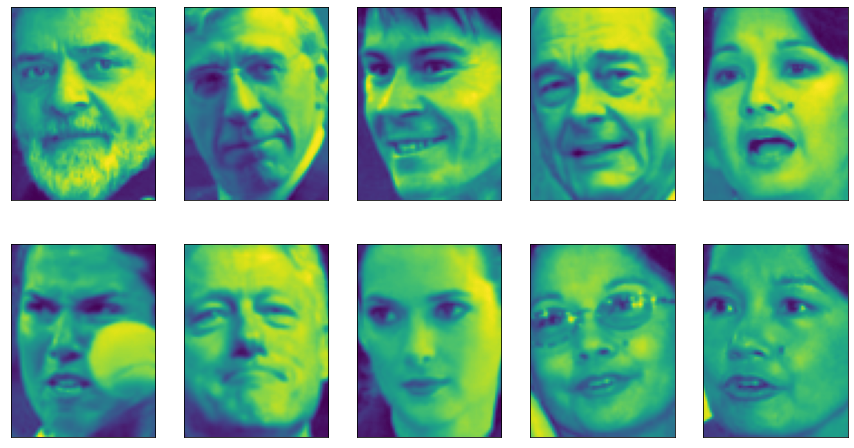

In [36]:
compn= 7
# sort by 7th component
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
print("7th component")

In [37]:
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_nmf, y_train)

print("test score: {:.2f}".format(knn.score(X_test_nmf, y_test)))

test score: 0.23
